# **Movie Rating Prediction Using Linear Regression Model**
CodSoft Task-2

Importing the Packages

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Loading Dataset

In [25]:
df=pd.read_csv("IMDB-Movie-Data.csv")
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


Generate summary statististics for the dataset

In [3]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


Dimension of the Dataframe

In [4]:
df.shape

(1000, 12)

Finding the null values in the Dataset

In [26]:
print(df.isnull().sum())

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64


Basic structure of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


**Plotting the heatmap of missing values**

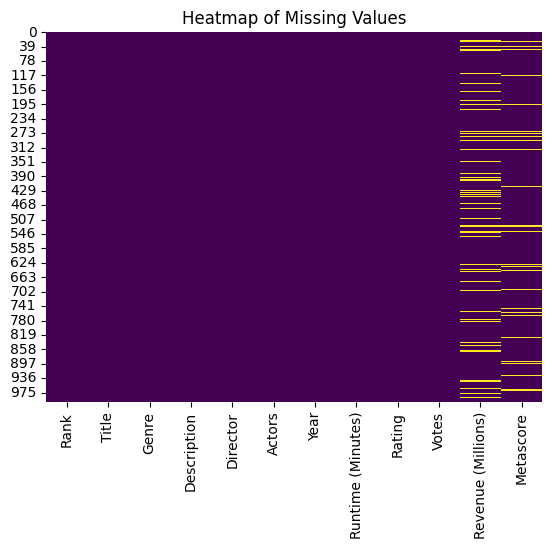

In [27]:

#plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Handling missing values by imputing with median

In [28]:
df["Revenue (Millions)"].fillna(df["Revenue (Millions)"].median(), inplace=True)
df["Metascore"].fillna(df["Metascore"].median(), inplace=True)



<ipython-input-28-dec1c3438c26>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-28-dec1c3438c26>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

**Verify if missing values are handled**

In [29]:
print(df.isnull().sum())

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64


Checking for Duplicate Values

In [30]:
duplicate=df.duplicated()
print(duplicate.sum())

0


In [11]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [47]:
df.head(10)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Genre_Mean_Rating,Director_Mean_Rating
0,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130,76.0,6.72400,7.133333
1,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460,65.0,6.85000,6.850000
2,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120,62.0,5.64375,5.533333
3,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320,59.0,7.10000,7.200000
4,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020,40.0,6.32963,7.166667
5,6,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.130,42.0,6.32963,6.100000
6,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.060,93.0,7.04000,8.400000
7,8,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,47.985,71.0,6.03125,6.400000
8,9,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.010,78.0,7.00000,7.100000
9,10,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.010,41.0,6.80000,7.550000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  1000 non-null   float64
 11  Metascore           1000 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


## Visualizing The Density of Movies Released Per Year

<ipython-input-31-a97b4c62f8b7>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




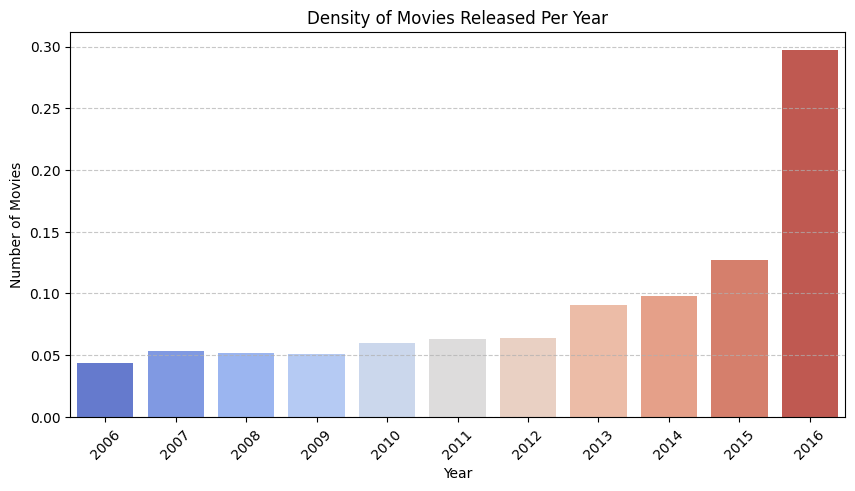

In [31]:
 # Count the number of movies per year
movies_per_year_density = df['Year'].value_counts(normalize=True).sort_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=movies_per_year_density.index, y=movies_per_year_density.values, palette='coolwarm')

# Labels and Title
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Density of Movies Released Per Year')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

Visualizing Trends in Average Movie Ratings by Genre

In [33]:
avg_rating_by_year = df.groupby(['Year','Genre'])['Rating'].mean().reset_index()

top_genres=df['Genre'].value_counts().head(10).index

average_rating_by_year=avg_rating_by_year[avg_rating_by_year['Genre'].isin(top_genres)]

fig=px.line(avg_rating_by_year, x='Year', y='Rating', color='Genre')

fig.update_layout(title='Average Rating by Year for Top Genre',xaxis_title='Year',yaxis_title='Average Rating')

fig.show()


## **Movie Rating Density Distribution**

In [34]:
rating_fig=px.histogram(df,x='Rating',histnorm='probability density',nbins=40)
rating_fig.update_layout(title='Rating Distribution',title_x=0.5, title_pad=dict(t=20),title_font=dict(size=20),xaxis_title='Rating',yaxis_title='Density')
rating_fig.show()

## Feature Engineering

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [36]:
df.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [37]:
df.drop('Title',axis=1,inplace=True) #Irrelevant attribute removed

Grouping the columns with their average rating and then creating a new feature


In [38]:
genre_mean_ratings = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_Mean_Rating'] = genre_mean_ratings

directory_mean_ratings = df.groupby('Director')['Rating'].transform('mean')
df['Director_Mean_Rating'] = directory_mean_ratings

# Sort genres by mean rating in descending order
sorted_genres = genre_mean_ratings.sort_values(ascending=False)

Selecting the predictor and target variable


In [39]:
x=df[['Year','Runtime (Minutes)','Genre_Mean_Rating','Director_Mean_Rating']]
y=df['Rating']

In [40]:
##splitting the dataset into training and testing parts
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model building

In [42]:
Model=LinearRegression()
Model.fit(x_train,y_train)
Model_pred=Model.predict(x_test)

Evaluation of the model

In [43]:
print('The performance evaluation of Logistic Regression is below: ', '\n')
print('MAE: ', mean_absolute_error(y_test, Model_pred))
print('MSE: ', mean_squared_error(y_test, Model_pred))
print('R2: ', r2_score(y_test, Model_pred))

The performance evaluation of Logistic Regression is below:  

MAE:  0.26910486104967435
MSE:  0.15664078220513308
R2:  0.8365880815416257


# **Model Testing**

In [44]:
x.head(5)

,Year,Runtime (Minutes),Genre_Mean_Rating,Director_Mean_Rating
0,2014,121,6.72400,7.133333
1,2012,124,6.85000,6.850000
2,2016,117,5.64375,5.533333
3,2016,108,7.10000,7.200000
4,2016,123,6.32963,7.166667


In [ ]:
y.head(5)

,Rating
0,8.1
1,7.0
2,7.3
3,7.2
4,6.2


**Entering data for testing**

In [45]:
new_data={'Year':[2025],'Runtime (Minutes)':[140],'Genre_Mean_Rating':[5.8],'Director_Mean_Rating':[6.2]}
new_df=pd.DataFrame(new_data)

# **Predict using the trained model**

In [46]:
rating_predicted=Model.predict(new_df)
print("Predicted rating:", rating_predicted[0])

Predicted rating: 5.777035200772495


# **Conclusion**

The Logistic Regression model demonstrated strong performance in predicting movie ratings, achieving an R² score of 0.8366, indicating that approximately 83.66% of the variance in movie ratings is explained by the model. The Mean Absolute Error (MAE) of 0.2691 suggests that, on average, the predicted ratings deviate from the actual ratings by 0.27 points, while the Mean Squared Error (MSE) of 0.1566 further confirms a low prediction error. These results indicate that the model effectively captures key patterns in the dataset, making it a reliable approach for movie rating prediction. However, further improvements could be explored by testing additional features, tuning hyperparameters, or using more complex models such as ensemble methods or deep learning.